In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
sales.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Features :
- Unnamed: 0 : Unnecessary column.
- TV : TV sales.
- Radio : Sales through Radio.
- Newspaper : Sales through Newspaper.

## Target :
- Sales

## Data Cleaning :

In [3]:
sales.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
sales.shape

(200, 4)

In [5]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## EDA :

<AxesSubplot:xlabel='TV', ylabel='sales'>

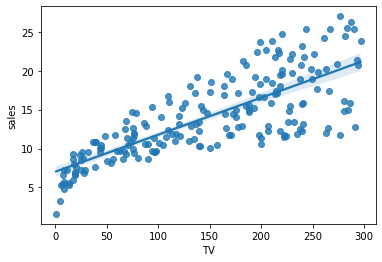

In [8]:
sns.regplot(x = 'TV',y = 'sales' ,data = sales )

Positive relation between TV and Sales.

<AxesSubplot:xlabel='radio', ylabel='sales'>

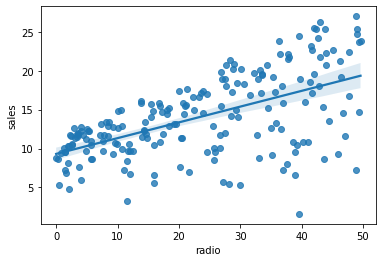

In [9]:
sns.regplot(x = 'radio',y = 'sales' ,data = sales )

Positive relationship between Radio and Sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

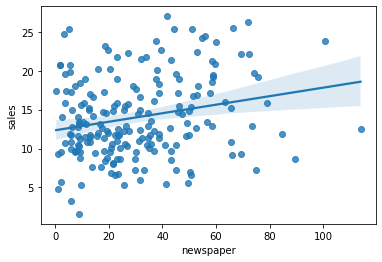

In [10]:
sns.regplot(x = 'newspaper',y = 'sales' ,data = sales )

Not a positive trend between Newspaper and Sales.

**- Normal Distribution.**

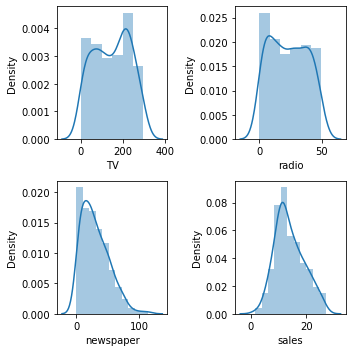

In [11]:
plt.figure(figsize = (5,5))
plotnumber = 1

for column in sales:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(sales[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

Dataset is not slightly have the distrubance and some skewness and outliers too.

**- Outlier.**

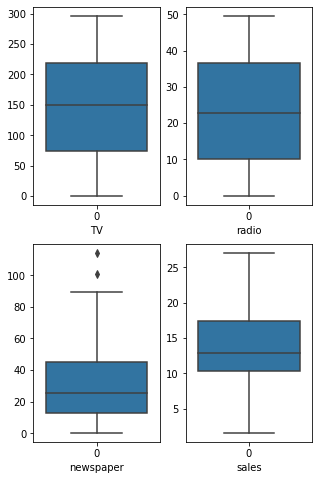

In [12]:
plt.figure(figsize = (5,8))
graph = 1
for column in sales:
    if graph <= 4:
        plt.subplot(2,2,graph)
        ax = sns.boxplot(data = sales[column])
        plt.xlabel(column)
    graph += 1
plt.show()

Only Newspaper column has an outliers.

In [13]:
out = ['TV','radio','newspaper']
scale = PowerTransformer()
sales[out] = scale.fit_transform(sales[out].values)
sales[out]

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


Used Power Transformer() to remove skewness and outliers.

<AxesSubplot:xlabel='newspaper'>

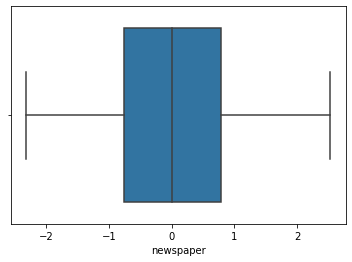

In [14]:
sns.boxplot(sales['newspaper'])

Removed the outliers for newspaper column.

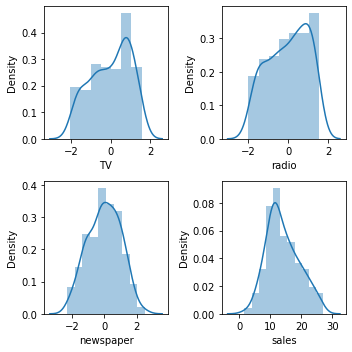

In [15]:
plt.figure(figsize = (5,5))
plotnumber = 1

for column in sales:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(sales[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

Now our dataset is in normal distribution.

**- Seperating Features and Target columns.**

In [16]:
x = sales.drop('sales',axis =1)
y = sales.sales

## Training the Model

**- Train Test Split.**

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4 )

**- Creating The function for the training and testing score, so that, we can get the results just nby calling the function.**

In [18]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('\n MAE Score:', mean_absolute_error(y_test,pred))
        print('\n MSE Score:', mean_squared_error(y_test,pred))
        print('\n RMSE SCore:', np.sqrt(mean_squared_error(y_test,pred)))
        print('\n Scatter Plot \n')
        plt.scatter(y_test, pred)
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [19]:
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()

**- Model Trainning For Linear Regression.**


 ----- Train Result ----- 

R2 Score: 0.9045406001043076

 ----- Test Result ----- 

R2 Score: 0.9091498622840183

 MAE Score: 1.169368829197043

 MSE Score: 2.2535979905363708

 RMSE SCore: 1.5011988510974723

 Scatter Plot 



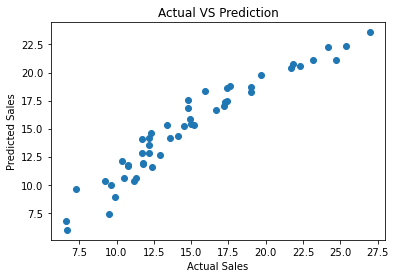

In [20]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- Model Trainning For SVM(SVR)**


 ----- Train Result ----- 

R2 Score: 0.9281297599765306

 ----- Test Result ----- 

R2 Score: 0.9301348803960812

 MAE Score: 0.7600435777493079

 MSE Score: 1.7330506822146237

 RMSE SCore: 1.3164538283641487

 Scatter Plot 



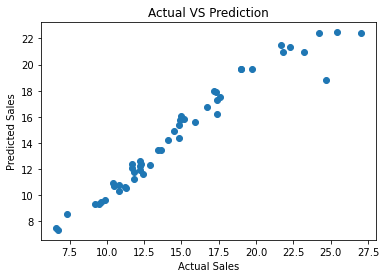

In [21]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)

**- Model Trainning For KNeighbors Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9570956002138278

 ----- Test Result ----- 

R2 Score: 0.9353560541656938

 MAE Score: 0.904

 MSE Score: 1.603536

 RMSE SCore: 1.266308019401283

 Scatter Plot 



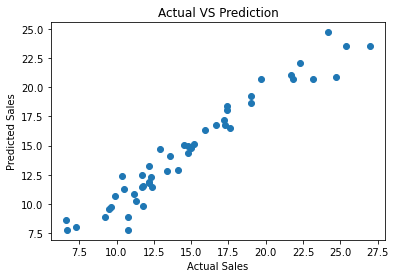

In [22]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

**- Model Trainning For GradientBoosting Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9989536015844889

 ----- Test Result ----- 

R2 Score: 0.9788051248680533

 MAE Score: 0.5760196693413961

 MSE Score: 0.5257529510450271

 RMSE SCore: 0.7250882367305561

 Scatter Plot 



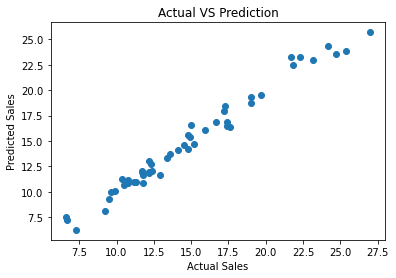

In [23]:
gbr.fit(x_train,y_train)
score(gbr, x_train,x_test,y_train,y_test,train = True)
score(gbr, x_train,x_test,y_train,y_test,train = False)

**- Model Trainning For AdaBoost Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9769937433576855

 ----- Test Result ----- 

R2 Score: 0.9470559139160524

 MAE Score: 0.8528615110048093

 MSE Score: 1.3133132101854819

 RMSE SCore: 1.1459987828027924

 Scatter Plot 



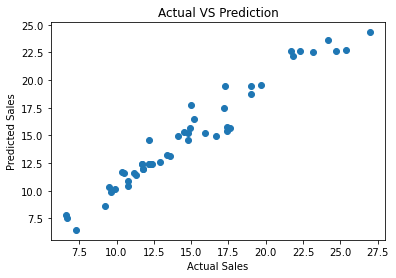

In [24]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- Model Trainning For RandomForest Regressor.**


 ----- Train Result ----- 

R2 Score: 0.9966238330188124

 ----- Test Result ----- 

R2 Score: 0.9712136357244863

 MAE Score: 0.6706799999999993

 MSE Score: 0.7140648799999971

 RMSE SCore: 0.8450235973036475

 Scatter Plot 



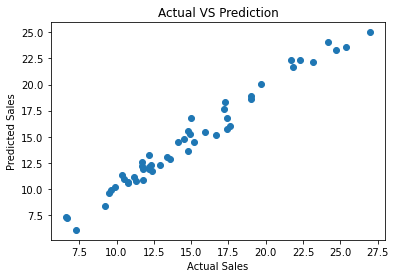

In [25]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)

**Among all the models, GradientBoostingRegressor() is giving the best result for our dataset.**

## Hyperparameter Tuning

In [78]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [79]:
params = {'n_estimators' : [10,30,60,90],
          'criterion':['friedman_mse', 'mse', 'mae'],
          'learning_rate': [0.1,0.5,0.9],
          'max_features':range(2,20,2),
          'max_leaf_nodes':range(2,6),
          'random_state': range(1,100,2)}

In [82]:
grid = GridSearchCV(gbr, param_grid = params)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'criterion': 'mae', 'learning_rate': 0.1, 'max_features': 2, 'max_leaf_nodes': 4, 'n_estimators': 90, 'random_state': 95}


In [27]:
gbr_h = GradientBoostingRegressor(criterion = 'mae', learning_rate = 0.1, max_features = 2, max_leaf_nodes = 4, n_estimators = 90, random_state = 95)


 ----- Train Result ----- 

R2 Score: 0.9967972946616347

 ----- Test Result ----- 

R2 Score: 0.9767709986596423

 MAE Score: 0.580428147779515

 MSE Score: 0.5762108023044616

 RMSE SCore: 0.7590855039483112

 Scatter Plot 



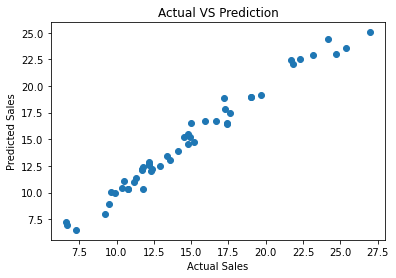

In [28]:
gbr_h.fit(x_train,y_train)
score(gbr_h, x_train,x_test,y_train,y_test,train = True)
score(gbr_h, x_train,x_test,y_train,y_test,train = False)

There is not much difference after tuning.

**- Saving the Model.**

In [33]:
filename = 'Sales.ipynb'
pickle.dump(GradientBoostingRegressor(), open(filename, 'wb'))